# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     926.1
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.07e-41
Time:                        16:50:03   Log-Likelihood:                0.57884
No. Observations:                  50   AIC:                             6.842
Df Residuals:                      46   BIC:                             14.49
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9879      0.085     58.684      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.45196936  4.97491945  5.45308389  5.85500398  6.16057432  6.36434602
  6.47642199  6.52079702  6.53141553  6.54659459  6.60272852  6.72830942
  6.93924602  7.23624986  7.60471845  8.01713438  8.43758637  8.82766938
  9.15279446  9.38787161  9.52143199  9.55751223  9.51499122  9.42448837
  9.32333289  9.24943077  9.23503686  9.30145556  9.45554052  9.68856861
  9.97767312 10.28960071 10.58617479 10.83056787 10.99335221 11.05733467
 11.02038155 10.89576913 10.7100024  10.49846039 10.29958346 10.14855771
 10.07153396 10.08133124 10.17533072 10.33590589 10.53331862 10.730605
 10.88964845 10.97744212]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.95610938 10.78318005 10.48129102 10.10202891  9.71329988  9.38270381
  9.16098349  9.06960105  9.09548322  9.1942222 ]


## Plot comparison

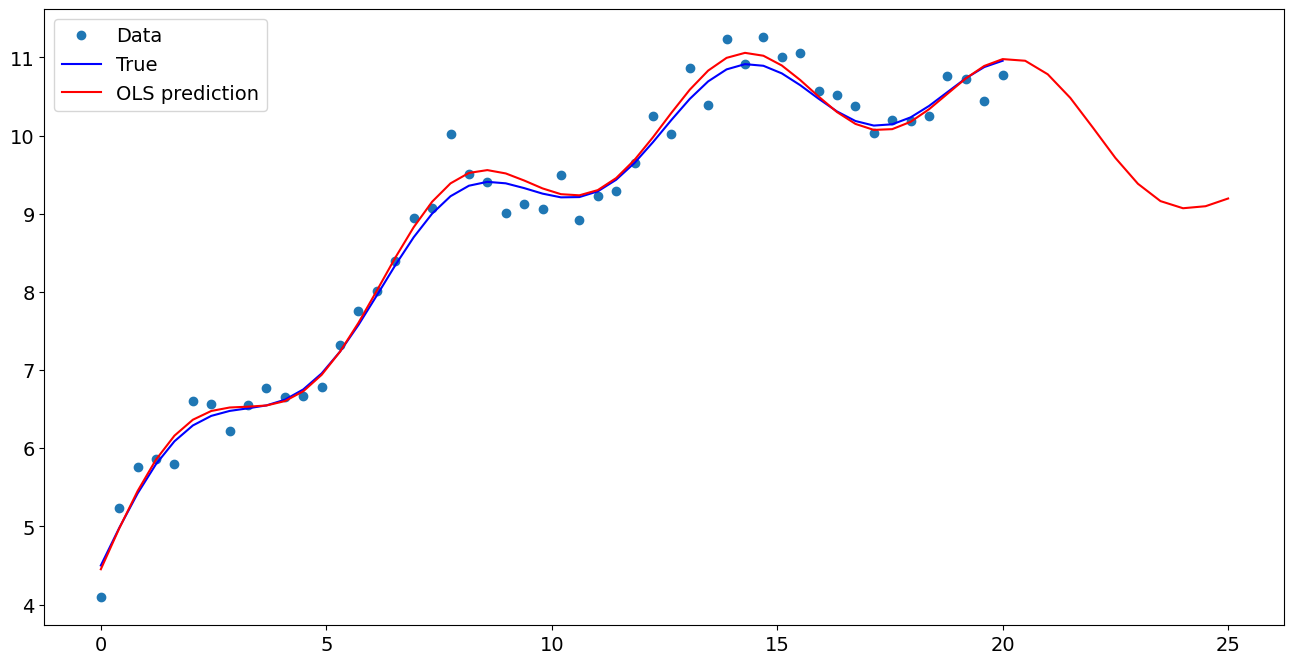

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.987862
x1                  0.514282
np.sin(x1)          0.577233
I((x1 - 5) ** 2)   -0.021436
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.956109
1    10.783180
2    10.481291
3    10.102029
4     9.713300
5     9.382704
6     9.160983
7     9.069601
8     9.095483
9     9.194222
dtype: float64